This notebook gives an example of using MARIGOLD and Python to reprocess and plot signals from the conductivity probes

In [2]:
# Import necessary modules
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import MARIGOLD as mgd
from MARIGOLD import Condition

# iPython magic
%matplotlib widget
%load_ext autoreload
%autoreload 2

# These are settings for the plot, to use good colors and fonts
from cycler import cycler
mpl.rcParams['axes.prop_cycle'] = cycler(color='rbgkmcy')
mpl.rcParams['figure.figsize'] = (8,6)
plt.rcParams['figure.dpi'] = 150

plt.rcParams["font.family"] = "serif"
plt.rcParams["mathtext.fontset"] = "cm"

In [3]:
jf2 = mgd.process_dir(r"C:\Users\adix\AM4-22S\90deg_jf2.0_jg0.10\P3\90", "AM4-22S", 1.4, 1.461, 1.620, 0.182, 0.312, 0.189, signal_output=1)
jf4 = mgd.process_dir(r"C:\Users\adix\AM4-22S\90deg_jf4.0_jg0.10\P3\90", "AM4-22S", 1.4, 1.461, 1.620, 0.182, 0.312, 0.189, signal_output=1)

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'C:\\Users\\adix\\AM4-22S\\90deg_jf2.0_jg0.10\\P3\\90'

In [ ]:
jf4_parent_dir = r"C:\Users\adix\AM4-22S\90deg_jf4.0_jg0.10\P3\90"
jf2_parent_dir = r"C:\Users\adix\AM4-22S\90deg_jf2.0_jg0.10\P3\90"

prefix = "r8o"

jf4_raw_signals = np.loadtxt( os.path.join(jf4_parent_dir, prefix + ".dat") )
jf4_median_signals = np.loadtxt( os.path.join(jf4, prefix + "_MedianSig.dat") )
jf4_norm_signals = np.loadtxt( os.path.join(jf4, prefix + "_NormSig.dat") )
jf4_squared_signals = np.loadtxt( os.path.join(jf4, prefix + "_SquareSig.dat") )

jf2_raw_signals = np.loadtxt( os.path.join(jf2_parent_dir, prefix + ".dat") )
jf2_median_signals = np.loadtxt( os.path.join(jf2, prefix + "_MedianSig.dat") )
jf2_norm_signals = np.loadtxt( os.path.join(jf2, prefix + "_NormSig.dat") )
jf2_squared_signals = np.loadtxt( os.path.join(jf2, prefix + "_SquareSig.dat") )

In [ ]:
raw_signals= jf2_raw_signals
median_signals = jf2_median_signals 
norm_signals= jf2_norm_signals
squared_signals= jf2_squared_signals

In [ ]:
xmin = np.random.rand() * 30
xmin = 2.402 # If you want to fix a location to zoom in on 

xmax = xmin + 0.005
time = 1/50000. * np.arange( len(raw_signals))

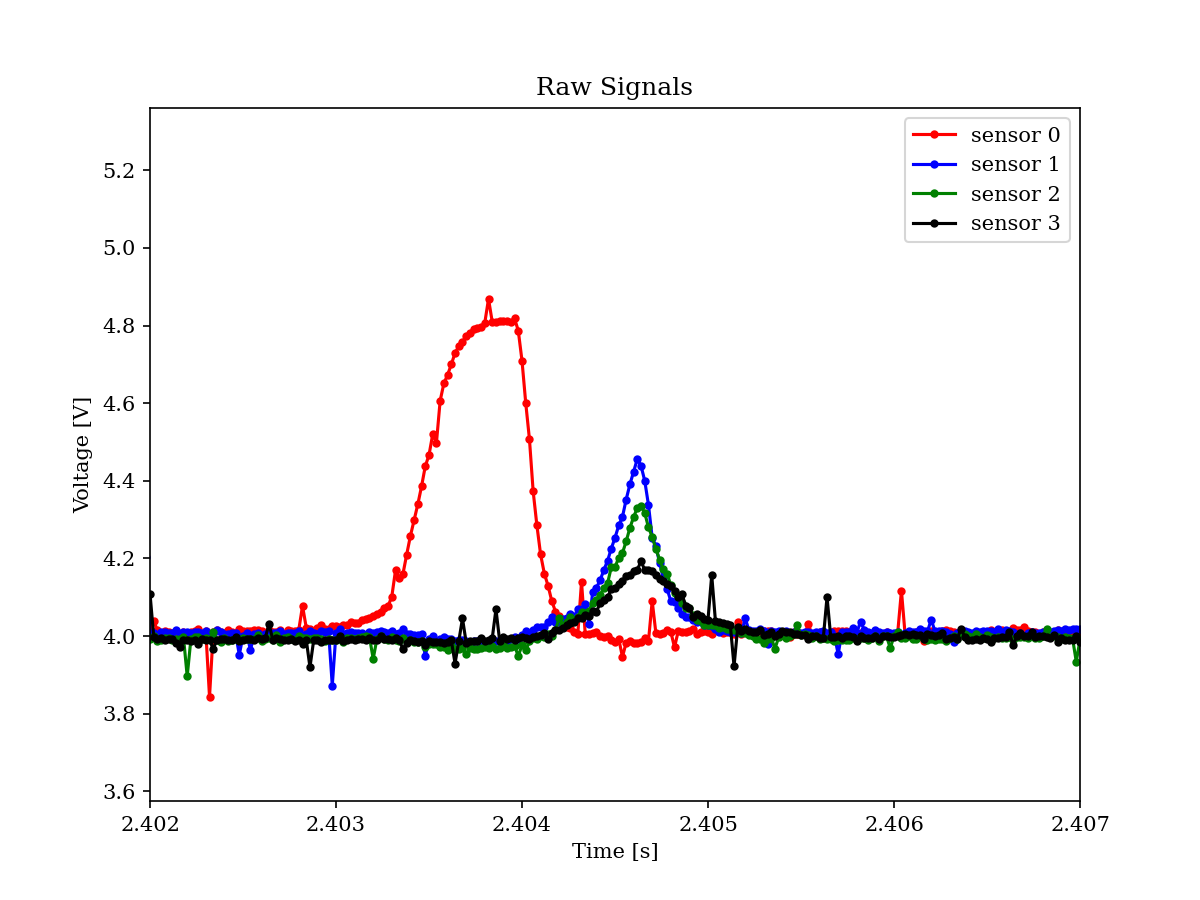

In [ ]:
plt.figure()
plt.plot(time, raw_signals, linestyle = 'solid', marker='.')
plt.legend(['sensor 0', 'sensor 1', 'sensor 2', 'sensor 3'])
plt.xlim([xmin, xmax])
plt.title('Raw Signals')
plt.xlabel('Time [s]')
plt.ylabel('Voltage [V]')
plt.show()

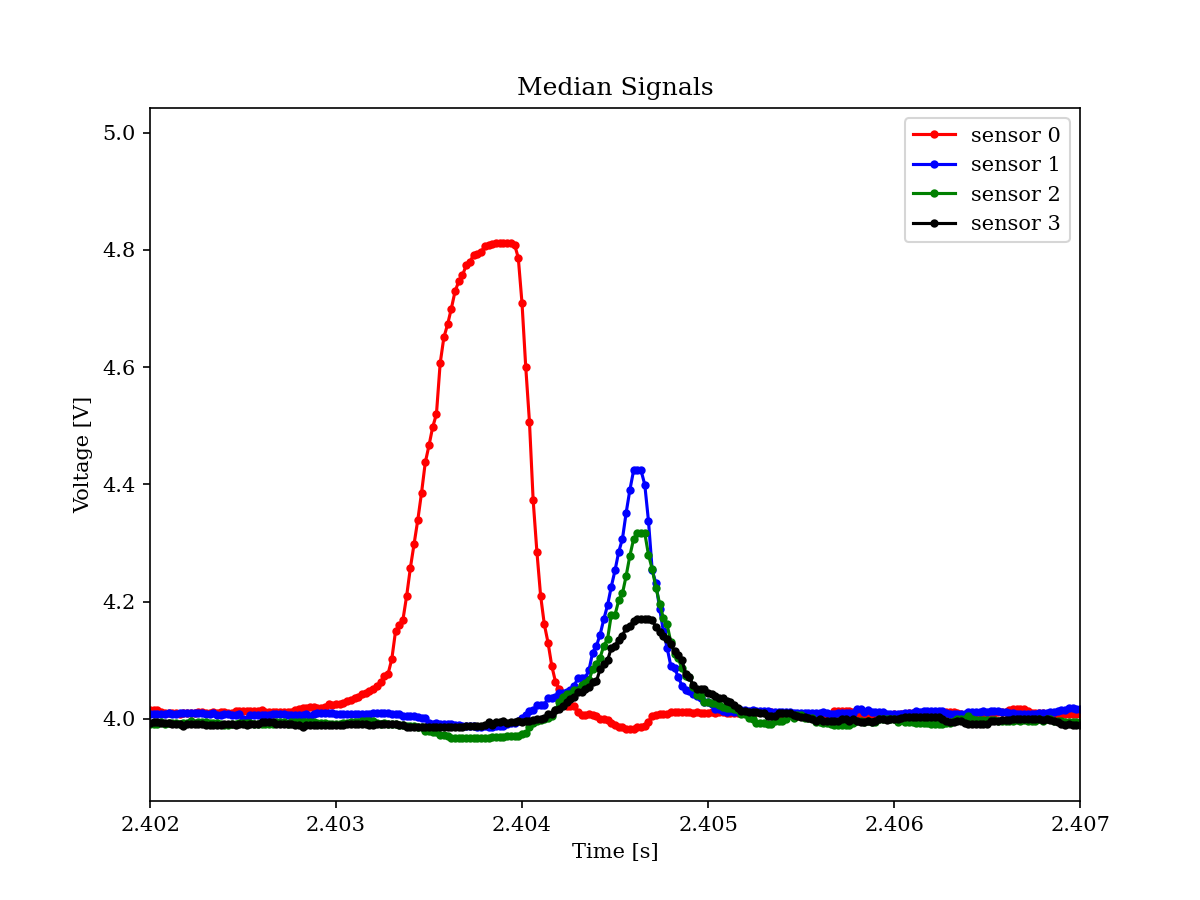

In [ ]:
plt.figure()
plt.plot(time, median_signals, linestyle = 'solid', marker='.')
plt.legend(['sensor 0', 'sensor 1', 'sensor 2', 'sensor 3'])
plt.xlim([xmin, xmax])
plt.title('Median Signals')
plt.xlabel('Time [s]')
plt.ylabel('Voltage [V]')
plt.show()

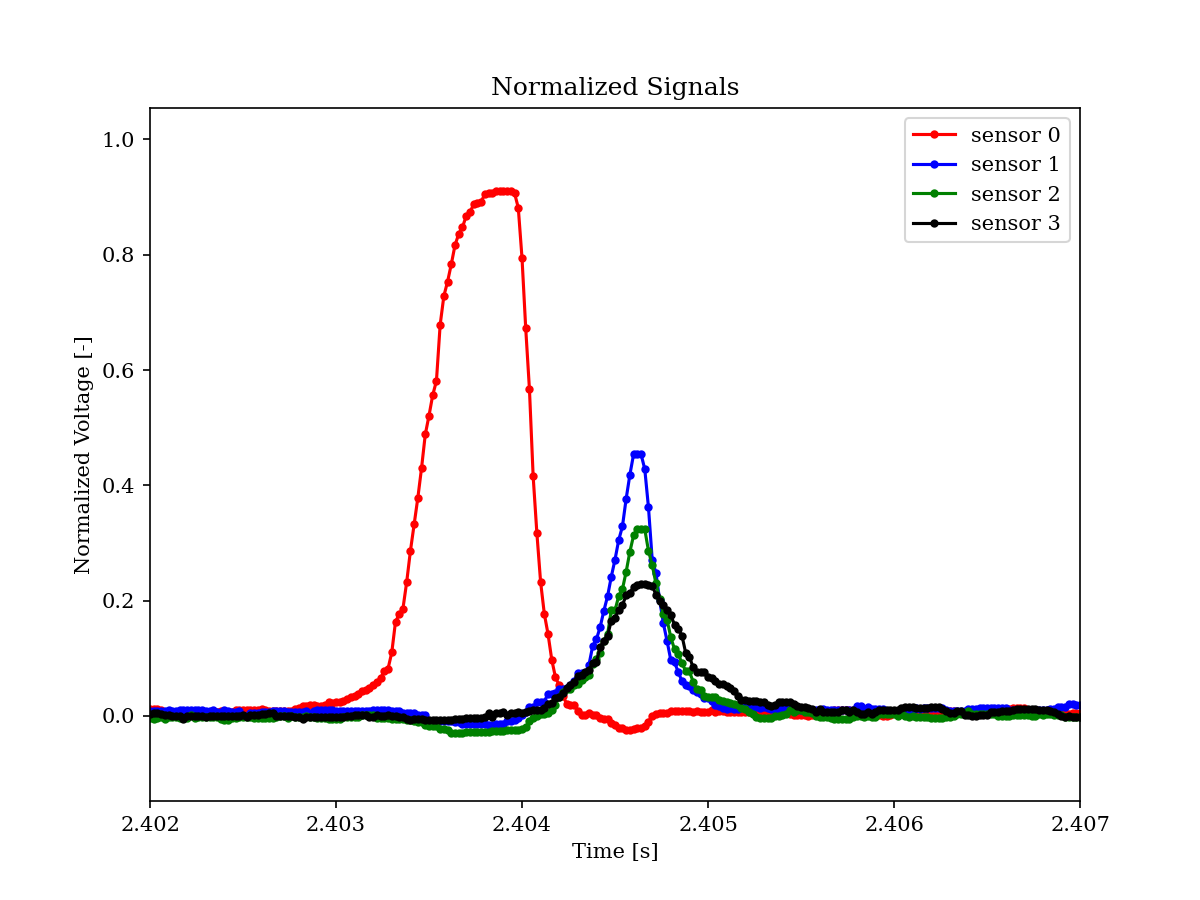

In [ ]:
plt.figure()
plt.plot(time, norm_signals, linestyle = 'solid', marker='.')
plt.legend(['sensor 0', 'sensor 1', 'sensor 2', 'sensor 3'])
plt.xlim([xmin, xmax])
plt.title('Normalized Signals')
plt.xlabel('Time [s]')
plt.ylabel('Normalized Voltage [-]')
plt.show()

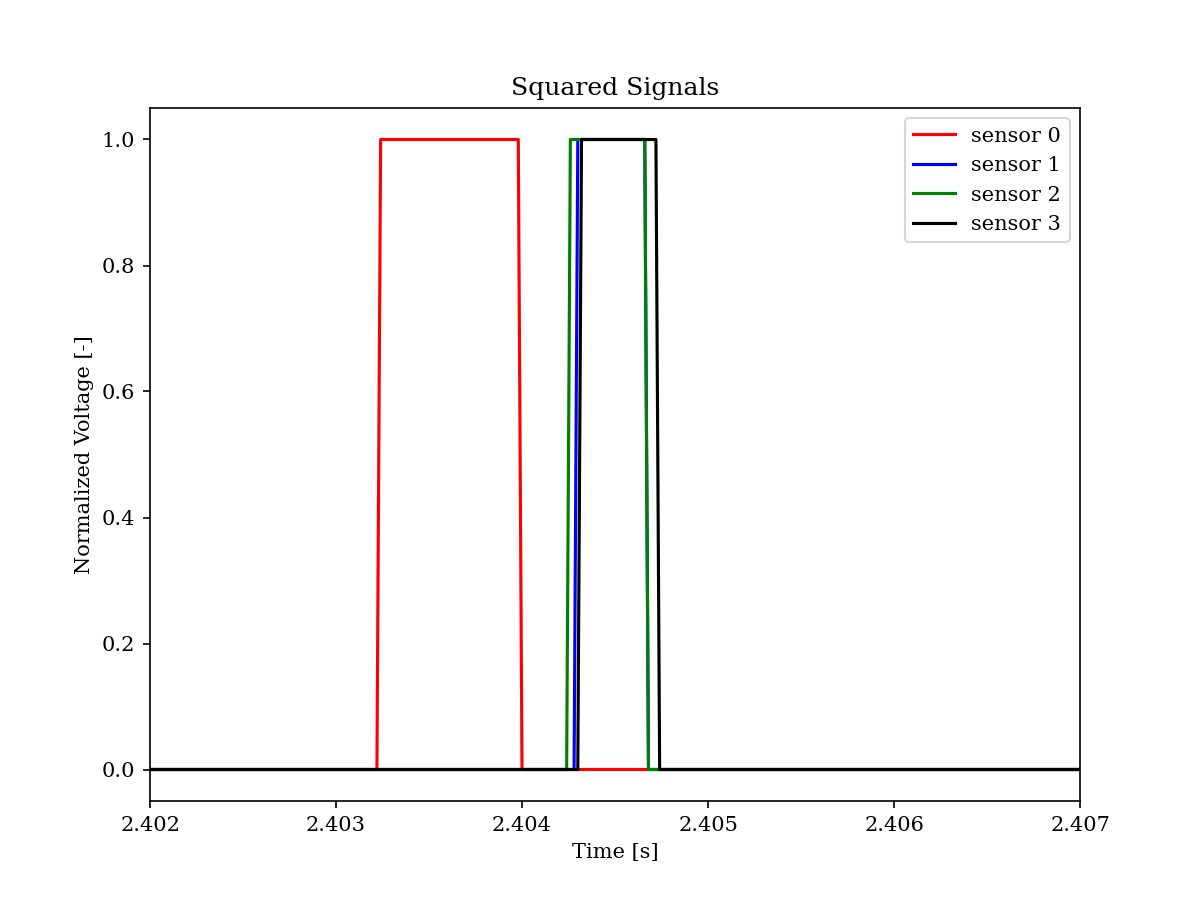

In [ ]:
plt.figure()
plt.plot(time, squared_signals, linestyle = 'solid', marker=None)
plt.legend(['sensor 0', 'sensor 1', 'sensor 2', 'sensor 3'])
plt.xlim([xmin, xmax])
plt.title('Squared Signals')
plt.xlabel('Time [s]')
plt.ylabel('Normalized Voltage [-]')
plt.show()